In [1]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
df1=pd.read_excel('1.xlsx')
print(df1.head())
print(df1.shape)
#event participation data of candidates

   Client ID  Event ID          End Reason Participation Begin Date  \
0   133416.0      99.0  Lack of Attendance               2019-01-29   
1   138398.0      99.0  Lack of Attendance               2019-01-29   
2   121101.0      99.0  Lack of Attendance               2019-01-29   
3   136905.0      99.0  Lack of Attendance               2019-01-29   
4   138845.0      99.0  Lack of Attendance               2019-01-29   

  Participation End Date   Status  
0    2019-01-29 00:00:00  No Show  
1    2019-01-29 00:00:00  No Show  
2    2019-01-29 00:00:00  No Show  
3    2019-01-29 00:00:00  No Show  
4    2019-01-29 00:00:00  No Show  
(37369, 6)


In [3]:

df1=df1[df1['Client ID'].notna()]
df1.columns[df1.isna().any()]


Index(['End Reason'], dtype='object')

In [4]:
df1['End Reason']=df1['End Reason'].fillna('Some Reason')
df1.tail()

,Client ID,Event ID,End Reason,Participation Begin Date,Participation End Date,Status
37357,97667.0,222.0,Some Reason,2020-02-05,9999-12-31 00:00:00,New/Pending
37358,79787.0,222.0,Some Reason,2020-02-05,9999-12-31 00:00:00,New/Pending
37366,17958.0,223.0,Successful Completion,2020-01-21,2020-01-21 00:00:00,Complete
37367,150071.0,223.0,Successful Completion,2020-01-21,2020-01-21 00:00:00,Complete
37368,150141.0,223.0,Some Reason,2020-02-18,2020-02-18 00:00:00,New/Pending


In [5]:
df2=pd.read_excel('2.xlsx')
print(df2.head())
print(df2.shape)
#EventID data

             Created Date  Event ID                         Event Name  \
0 2019-01-17 13:19:57.140        99   Intermediate Microsoft Word 2019   
1 2019-01-17 13:19:57.547       100               Computer Basics 2019   
2 2019-01-17 13:28:37.880       101  Intermediate Microsoft Excel 2019   
3 2019-01-17 13:34:29.197       102       Advanced Microsoft Word 2019   
4 2019-01-17 13:35:01.973       103      Advanced Microsoft Excel 2019   

  Type of Event  
0      Workshop  
1      Workshop  
2      Workshop  
3      Workshop  
4      Workshop  
(126, 4)


In [6]:
df2=df2[df1['Event ID'].notna()]
df2.columns[df2.isna().any()]


C:\Users\SWATHI~1\AppData\Local\Temp/ipykernel_24264/1792439328.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2=df2[df1['Event ID'].notna()]


Index([], dtype='object')

In [7]:
df3=pd.read_csv('3.xlsx')
df3.head()
#Students data

,Birth Year,Client Home Phone,Client Mobile Phone,ClientID,Disabling Condition,Have you served in the Military?,Zip Code,Race,Created Date
0,1966.0,Provided,NaN,144047,No,No,28052.0,White,1/16/2019 13:35
1,1986.0,Provided,NaN,144048,No,No,28052.0,NaN,1/16/2019 13:42
2,1989.0,Provided,Provided,144049,No,No,28052.0,White,1/16/2019 14:00
3,1996.0,Provided,Provided,144050,No,No,28056.0,White,1/16/2019 14:15
4,1993.0,NaN,Provided,144051,No,No,28216.0,Black or African American,1/16/2019 14:36


In [8]:
df3['Client Home Phone']=df3['Client Home Phone'].fillna('Not Provided')
df3['Client Mobile Phone']=df3['Client Mobile Phone'].fillna('Not Provided')
df3.head()

,Birth Year,Client Home Phone,Client Mobile Phone,ClientID,Disabling Condition,Have you served in the Military?,Zip Code,Race,Created Date
0,1966.0,Provided,Not Provided,144047,No,No,28052.0,White,1/16/2019 13:35
1,1986.0,Provided,Not Provided,144048,No,No,28052.0,NaN,1/16/2019 13:42
2,1989.0,Provided,Provided,144049,No,No,28052.0,White,1/16/2019 14:00
3,1996.0,Provided,Provided,144050,No,No,28056.0,White,1/16/2019 14:15
4,1993.0,Not Provided,Provided,144051,No,No,28216.0,Black or African American,1/16/2019 14:36


In [9]:
df4=pd.read_csv('4.xlsx')
df4.head()
#work history data

,ClientID,Date Job Ended,Date Started,Employment Type,Hourly Wage,Is placement?,Job Title,Placement Date,Reason Left,Shift Type
0,116340,NaN,1/28/2019 0:00,Temporary,7.50,No,Inserter,NaN,NaN,1st Shift
1,139907,NaN,1/11/2018 0:00,NaN,16.35,Yes,HR Customer Servicew Rep,12/27/2017 9:25,NaN,1st Shift
2,129078,NaN,1/2/2018 0:00,NaN,18.00,Yes,Appliance Repair Technician,1/2/2018 10:11,NaN,1st Shift
3,63391,NaN,1/8/2018 0:00,NaN,12.00,Yes,Child Support Enforcment With Meck County,1/11/2018 15:01,NaN,NaN
4,114674,NaN,1/3/2018 0:00,NaN,9.50,Yes,Material Handler,1/23/2018 15:00,NaN,1st Shift


In [10]:
df5=pd.read_excel('5.xlsx')
df5.head()
#funded data

,Client ID,Enroll Date,Exit Date,Program
0,96512,2019-01-16,2019-01-17,Program Name X
1,118218,2019-01-16,2019-01-17,Program Name X
2,130619,2019-01-16,2019-01-17,Program Name VII
3,137588,2019-01-16,NaT,Program Name X
4,83431,2019-01-16,NaT,Program Name II


In [11]:
df12=pd.merge(df1,df2,on='Event ID',how='outer')
df12.head()

,Client ID,Event ID,End Reason,Participation Begin Date,Participation End Date,Status,Created Date,Event Name,Type of Event
0,133416.0,99.0,Lack of Attendance,2019-01-29,2019-01-29 00:00:00,No Show,2019-01-17 13:19:57.140,Intermediate Microsoft Word 2019,Workshop
1,138398.0,99.0,Lack of Attendance,2019-01-29,2019-01-29 00:00:00,No Show,2019-01-17 13:19:57.140,Intermediate Microsoft Word 2019,Workshop
2,121101.0,99.0,Lack of Attendance,2019-01-29,2019-01-29 00:00:00,No Show,2019-01-17 13:19:57.140,Intermediate Microsoft Word 2019,Workshop
3,136905.0,99.0,Lack of Attendance,2019-01-29,2019-01-29 00:00:00,No Show,2019-01-17 13:19:57.140,Intermediate Microsoft Word 2019,Workshop
4,138845.0,99.0,Lack of Attendance,2019-01-29,2019-01-29 00:00:00,No Show,2019-01-17 13:19:57.140,Intermediate Microsoft Word 2019,Workshop


In [12]:
df34=pd.merge(df3,df4,on='ClientID',how='outer')
df34=df34.rename(columns={'ClientID':'Client ID'})
df34.head()

,Birth Year,Client Home Phone,Client Mobile Phone,Client ID,Disabling Condition,Have you served in the Military?,Zip Code,Race,Created Date,Date Job Ended,Date Started,Employment Type,Hourly Wage,Is placement?,Job Title,Placement Date,Reason Left,Shift Type
0,1966.0,Provided,Not Provided,144047,No,No,28052.0,White,1/16/2019 13:35,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1986.0,Provided,Not Provided,144048,No,No,28052.0,NaN,1/16/2019 13:42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1989.0,Provided,Provided,144049,No,No,28052.0,White,1/16/2019 14:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1996.0,Provided,Provided,144050,No,No,28056.0,White,1/16/2019 14:15,NaN,1/26/2019 0:00,Regular,15.0,Yes,Dental Assistant,1/26/2019 0:00,NaN,1st Shift
4,1993.0,Not Provided,Provided,144051,No,No,28216.0,Black or African American,1/16/2019 14:36,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df125=pd.merge(df12,df5,on='Client ID',how='outer')

df125.head()

,Client ID,Event ID,End Reason,Participation Begin Date,Participation End Date,Status,Created Date,Event Name,Type of Event,Enroll Date,Exit Date,Program
0,133416.0,99.0,Lack of Attendance,2019-01-29,2019-01-29 00:00:00,No Show,2019-01-17 13:19:57.140,Intermediate Microsoft Word 2019,Workshop,NaT,NaT,NaN
1,133416.0,101.0,Lack of Attendance,2019-01-31,2019-01-31 00:00:00,No Show,2019-01-17 13:28:37.880,Intermediate Microsoft Excel 2019,Workshop,NaT,NaT,NaN
2,133416.0,102.0,Lack of Attendance,2019-01-30,2019-01-30 00:00:00,No Show,2019-01-17 13:34:29.197,Advanced Microsoft Word 2019,Workshop,NaT,NaT,NaN
3,133416.0,103.0,Lack of Attendance,2019-02-01,2019-02-01 00:00:00,No Show,2019-01-17 13:35:01.973,Advanced Microsoft Excel 2019,Workshop,NaT,NaT,NaN
4,138398.0,99.0,Lack of Attendance,2019-01-29,2019-01-29 00:00:00,No Show,2019-01-17 13:19:57.140,Intermediate Microsoft Word 2019,Workshop,2019-08-05,NaT,Program Name II


In [14]:
df=pd.merge(df125,df34,on='Client ID',how='outer')
df.head()
#merging all the data sets

,Client ID,Event ID,End Reason,Participation Begin Date,Participation End Date,Status,Created Date_x,Event Name,Type of Event,Enroll Date,...,Created Date_y,Date Job Ended,Date Started,Employment Type,Hourly Wage,Is placement?,Job Title,Placement Date,Reason Left,Shift Type
0,133416.0,99.0,Lack of Attendance,2019-01-29,2019-01-29 00:00:00,No Show,2019-01-17 13:19:57.140,Intermediate Microsoft Word 2019,Workshop,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,133416.0,101.0,Lack of Attendance,2019-01-31,2019-01-31 00:00:00,No Show,2019-01-17 13:28:37.880,Intermediate Microsoft Excel 2019,Workshop,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,133416.0,102.0,Lack of Attendance,2019-01-30,2019-01-30 00:00:00,No Show,2019-01-17 13:34:29.197,Advanced Microsoft Word 2019,Workshop,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,133416.0,103.0,Lack of Attendance,2019-02-01,2019-02-01 00:00:00,No Show,2019-01-17 13:35:01.973,Advanced Microsoft Excel 2019,Workshop,NaT,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,138398.0,99.0,Lack of Attendance,2019-01-29,2019-01-29 00:00:00,No Show,2019-01-17 13:19:57.140,Intermediate Microsoft Word 2019,Workshop,2019-08-05,...,NaN,NaN,10/14/2019 0:00,Regular,15.0,Yes,Mortgage Loan Assistant,10/15/2019 0:00,NaN,NaN


In [15]:
df.shape

(60511, 29)

In [16]:
df.isna().sum()
#finding the null values

Client ID                              23
Event ID                             6575
End Reason                           6598
Participation Begin Date             6598
Participation End Date               6598
Status                               6598
Created Date_x                       6575
Event Name                           6575
Type of Event                        6575
Enroll Date                         25143
Exit Date                           55380
Program                             25143
Birth Year                          33795
Client Home Phone                   24392
Client Mobile Phone                 24392
Disabling Condition                 24501
Have you served in the Military?    24395
Zip Code                            25726
Race                                26468
Created Date_y                      24392
Date Job Ended                      53987
Date Started                        35463
Employment Type                     41540
Hourly Wage                       

In [17]:
df=df.drop_duplicates()
# dropping the duplicate values

In [18]:
df.isna().sum()
#finding the null values after dropping duplicates

Client ID                              23
Event ID                             6572
End Reason                           6595
Participation Begin Date             6595
Participation End Date               6595
Status                               6595
Created Date_x                       6572
Event Name                           6572
Type of Event                        6572
Enroll Date                         11492
Exit Date                           15644
Program                             11492
Birth Year                           9971
Client Home Phone                    6761
Client Mobile Phone                  6761
Disabling Condition                  6783
Have you served in the Military?     6764
Zip Code                             7151
Race                                 7243
Created Date_y                       6761
Date Job Ended                      15082
Date Started                        10569
Employment Type                     12924
Hourly Wage                       

In [19]:
df.columns

Index(['Client ID', 'Event ID', 'End Reason', 'Participation Begin Date',
       'Participation End Date', 'Status', 'Created Date_x', 'Event Name',
       'Type of Event', 'Enroll Date', 'Exit Date', 'Program', 'Birth Year',
       'Client Home Phone', 'Client Mobile Phone', 'Disabling Condition',
       'Have you served in the Military?', 'Zip Code', 'Race',
       'Created Date_y', 'Date Job Ended', 'Date Started', 'Employment Type',
       'Hourly Wage', 'Is placement?', 'Job Title', 'Placement Date',
       'Reason Left', 'Shift Type'],
      dtype='object')

In [20]:
placed=df[df['Is placement?'].notna()]
# dropping the rows where target variable is null

In [21]:
placed.isna().sum()

Client ID                              0
Event ID                            2561
End Reason                          2561
Participation Begin Date            2561
Participation End Date              2561
Status                              2561
Created Date_x                      2561
Event Name                          2561
Type of Event                       2561
Enroll Date                         2955
Exit Date                           5185
Program                             2955
Birth Year                          3783
Client Home Phone                   3478
Client Mobile Phone                 3478
Disabling Condition                 3491
Have you served in the Military?    3478
Zip Code                            3590
Race                                3589
Created Date_y                      3478
Date Job Ended                      4402
Date Started                           0
Employment Type                     2087
Hourly Wage                          118
Is placement?   

In [22]:
placed.shape

(5865, 29)

In [23]:
columns_needed=['Client ID','Event ID','End Reason','Status','Event Name','Type of Event','Program','Hourly Wage','Job Title','Is placement?']
data=placed[columns_needed]

In [24]:
data=data.dropna()
# dropping the insignificant null values

In [25]:
data.isna().sum()

Client ID        0
Event ID         0
End Reason       0
Status           0
Event Name       0
Type of Event    0
Program          0
Hourly Wage      0
Job Title        0
Is placement?    0
dtype: int64

In [26]:
data.shape
data.to_csv('filename.csv')
#master file for modelling

In [27]:
data.head()

,Client ID,Event ID,End Reason,Status,Event Name,Type of Event,Program,Hourly Wage,Job Title,Is placement?
4,138398.0,99.0,Lack of Attendance,No Show,Intermediate Microsoft Word 2019,Workshop,Program Name II,15.0,Mortgage Loan Assistant,Yes
5,138398.0,99.0,Some Reason,Acknowledged,Intermediate Microsoft Word 2019,Workshop,Program Name II,15.0,Mortgage Loan Assistant,Yes
6,138398.0,101.0,Successful Completion,Complete,Intermediate Microsoft Excel 2019,Workshop,Program Name II,15.0,Mortgage Loan Assistant,Yes
7,138398.0,102.0,Some Reason,Acknowledged,Advanced Microsoft Word 2019,Workshop,Program Name II,15.0,Mortgage Loan Assistant,Yes
8,138398.0,103.0,Successful Completion,Complete,Advanced Microsoft Excel 2019,Workshop,Program Name II,15.0,Mortgage Loan Assistant,Yes


In [28]:
lb=LabelEncoder()
data['Is placement?']=lb.fit_transform(data['Is placement?'])
# converting the catagorical variables to numerical


In [30]:
lb.classes_

array(['No', 'Yes'], dtype=object)

In [31]:
scale_cols=['End Reason','Status','Event Name','Type of Event','Program','Job Title']
data[scale_cols]=data[scale_cols].apply(lb.fit_transform)


In [32]:
data.head()
data.to_csv('filename2.csv')

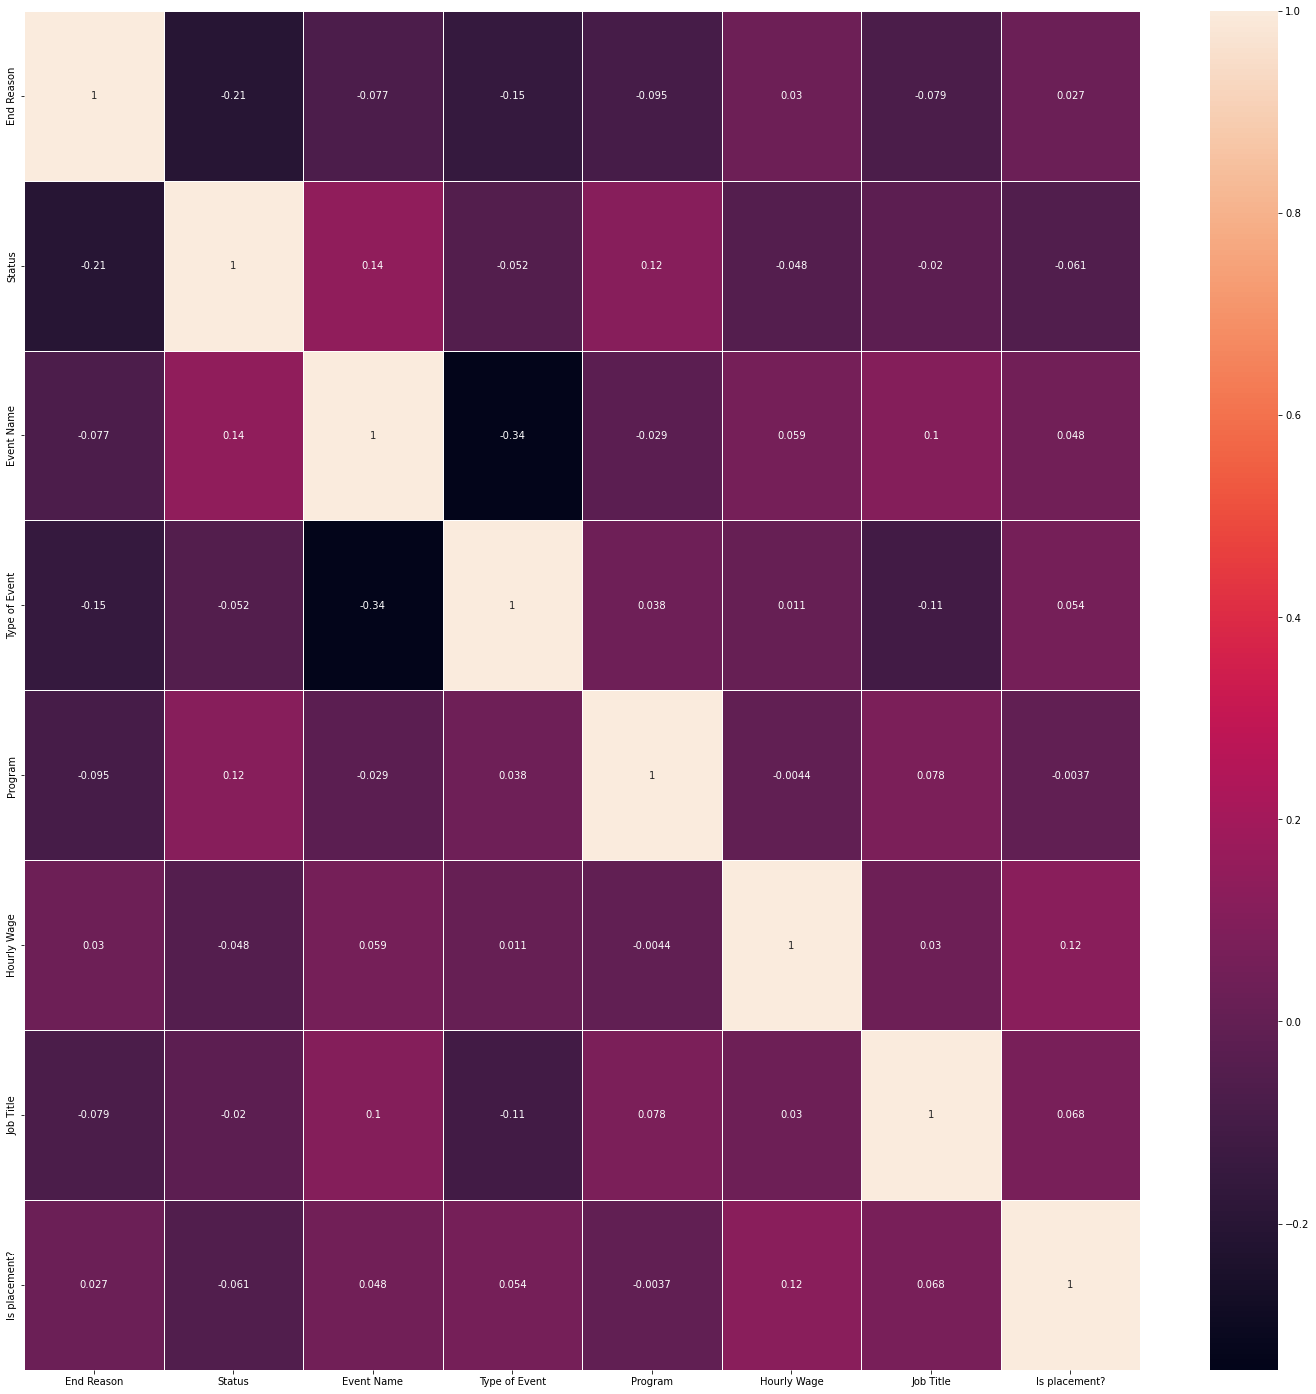

In [33]:
XY=data.drop(['Client ID','Event ID'],axis=1)
f,ax = plt.subplots(figsize=(25, 25)) 
sns.heatmap(XY.corr(), annot=True, linewidths=.5, ax=ax)
plt.show()
#check the correlation among variables to check multi collinearity


In [34]:
X=data.drop(['Is placement?','Client ID','Event ID'],axis=1)
Y=data['Is placement?']
X.head()

,End Reason,Status,Event Name,Type of Event,Program,Hourly Wage,Job Title
4,2,4,39,6,0,15.0,214
5,3,0,39,6,0,15.0,214
6,4,2,38,6,0,15.0,214
7,3,0,4,6,0,15.0,214
8,4,2,3,6,0,15.0,214


In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,random_state=1,test_size=0.25)
# splitting the data to train and test

In [36]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier



In [37]:
gb=GradientBoostingClassifier(learning_rate=0.5,n_estimators=1000)
gb.fit(X_train,Y_train)
gb_pred=gb.predict(X_test)
#building the model

In [38]:
accuracy_score(Y_test,gb_pred)*100

98.98648648648648

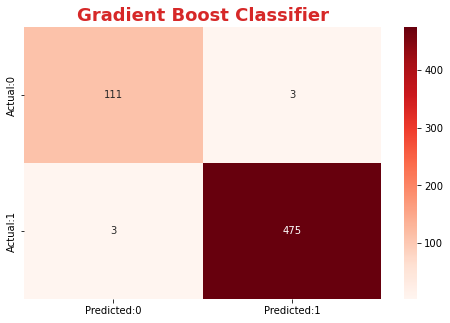

In [39]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(Y_test,gb_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Reds')
fm={'size':18,'color':'#d62828','weight':'bold'}
plt.title('Gradient Boost Classifier',**fm)
plt.show()
# confusion matrix to check accuracy of model

In [40]:
from sklearn.ensemble import AdaBoostClassifier

In [41]:
ada=AdaBoostClassifier(n_estimators=1000,learning_rate=0.6)
ada.fit(X_train,Y_train)
ada_pred=ada.predict(X_test)
#building model

In [42]:
print('Accuracy',accuracy_score(Y_test,ada_pred)*100)

Accuracy 91.21621621621621


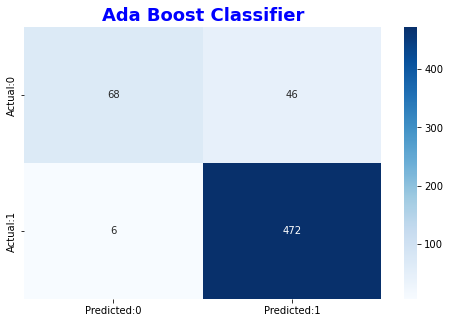

In [43]:
cm=confusion_matrix(Y_test,ada_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
plt.figure(figsize=(8,5))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Blues')
fm={'size':18,'color':'#0000FF','weight':'bold'}
plt.title('Ada Boost Classifier',**fm)
plt.show()
# confusion matrix to check accuracy of model